### Classification of Fraud/Non Fraud Transactions

Data Source: The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
print(f"The number of entries in this dataset is {len(df)}")

The number of entries in this dataset is 568630


In [4]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isnull().sum().max()

0

In [7]:
print(f"No. of non-fraud transactions = {df['Class'].value_counts()[0]}")
print(f"No. of fraud transactions = {df['Class'].value_counts()[1]}")

No. of non-fraud transactions = 284315
No. of fraud transactions = 284315


This dataset does not have an imbalance problem

(50.01, 24039.93)

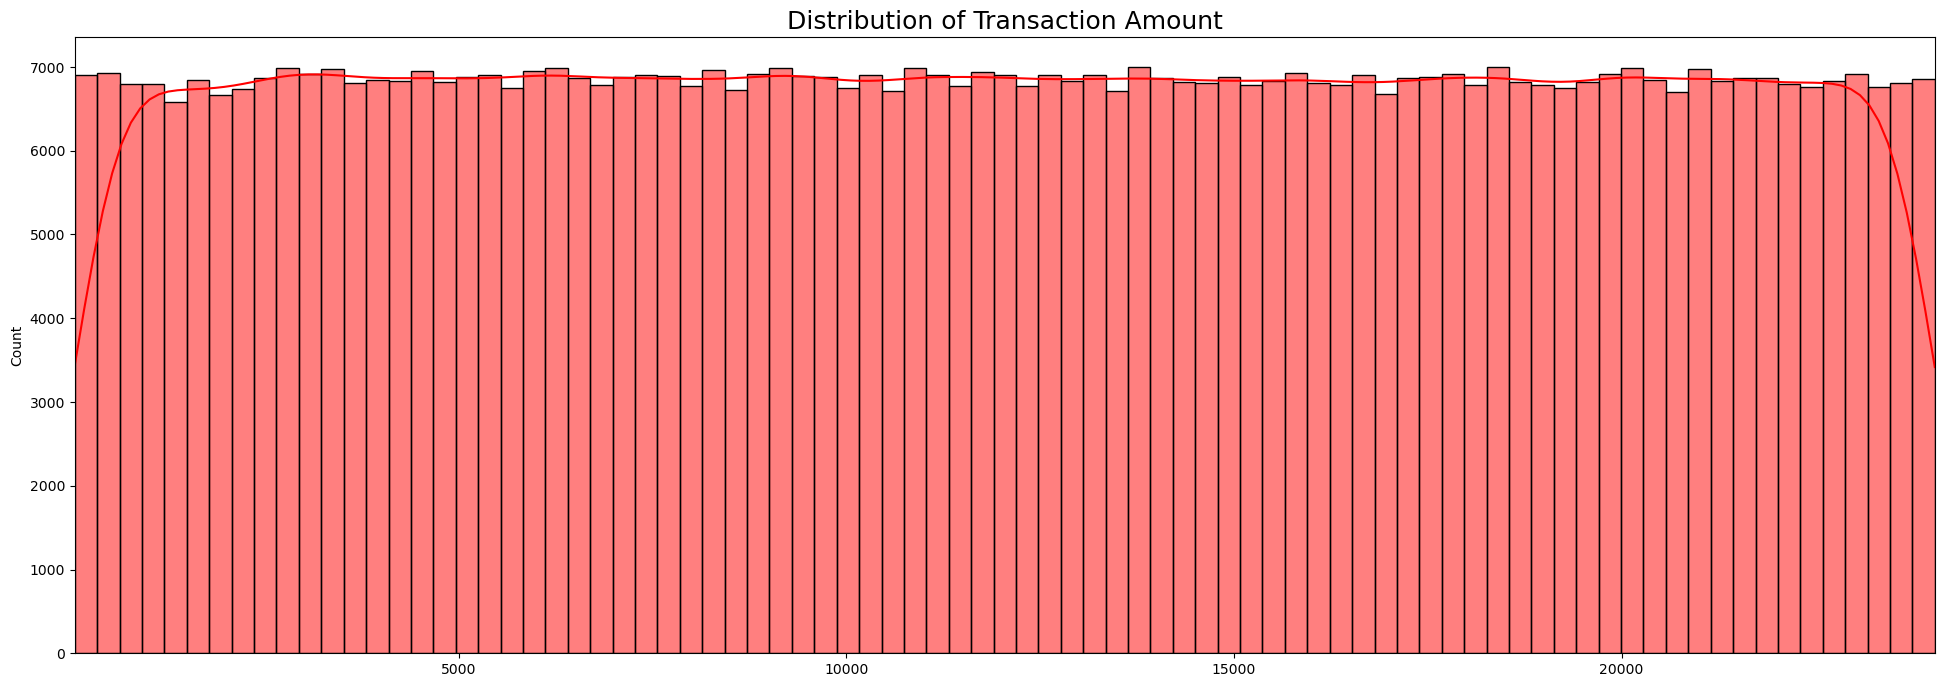

In [8]:
amount = df['Amount'].values

fig, ax = plt.subplots(1, 1, figsize=(24,8))

sns.histplot(amount, color='r', kde=True)
ax.set_title('Distribution of Transaction Amount', fontsize=18)
ax.set_xlim(min(amount), max(amount))

### Scaling 
First, we need to scale the Amount column as scaled as the other columns.

In [9]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

scaled_amount = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.insert(1, 'scaled_amount', scaled_amount)

In [10]:
# from sklearn.preprocessing import StandardScaler

# standard_scaler = StandardScaler()

# scaled_amount = standard_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df.insert(1, 'scaled_amount', scaled_amount)

In [11]:
df.drop(columns=['id', 'Amount'], axis=1, inplace=True)
df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.496764,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0
1,-0.458942,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0
2,-0.794279,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0
3,-0.554667,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0
4,0.187692,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0


### Correlation Matrix 

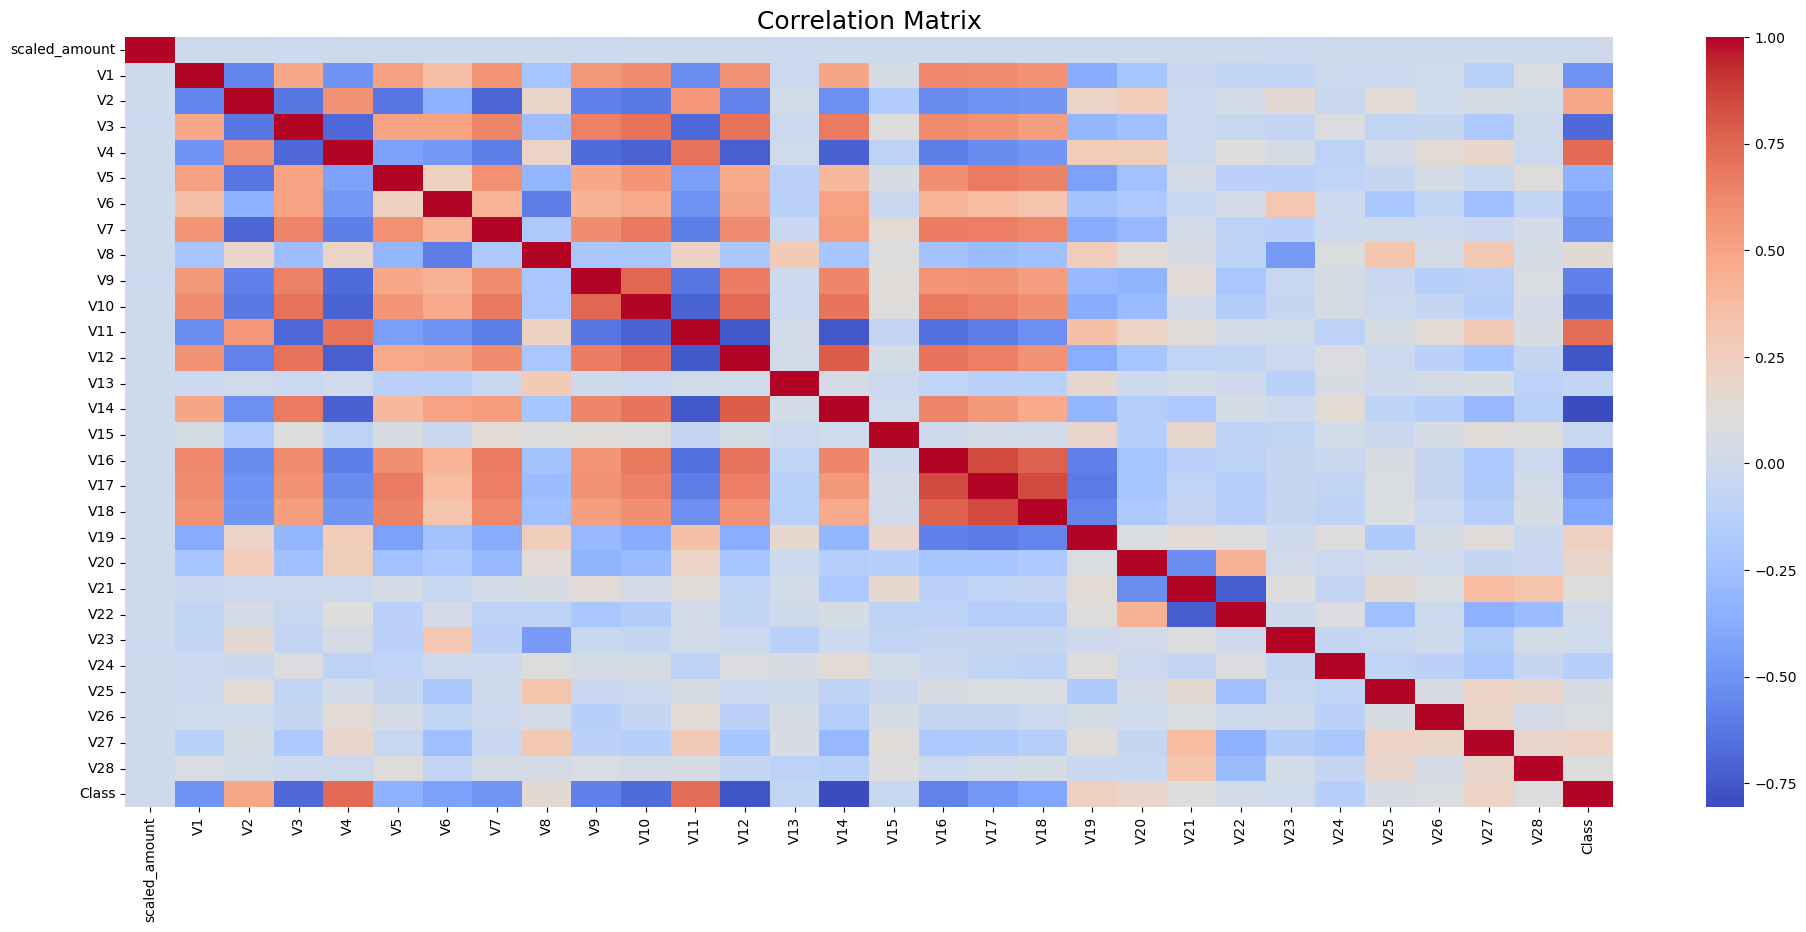

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(24,10))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix', fontsize=18)

plt.show()

In [13]:
# From below, we can identify features that are highly negative and positive correlated. Let's use boxplots to get a better understanding.

corr["Class"].sort_values()

V14             -0.805669
V12             -0.768579
V3              -0.682095
V10             -0.673665
V9              -0.585522
V16             -0.573511
V1              -0.505761
V7              -0.491234
V17             -0.476377
V6              -0.435088
V18             -0.410091
V5              -0.338639
V24             -0.130107
V13             -0.071105
V15             -0.037948
scaled_amount    0.002261
V23              0.010255
V22              0.014098
V25              0.061847
V26              0.071052
V28              0.102024
V21              0.109640
V8               0.144294
V20              0.179851
V27              0.214002
V19              0.244081
V2               0.491878
V11              0.724278
V4               0.735981
Class            1.000000
Name: Class, dtype: float64

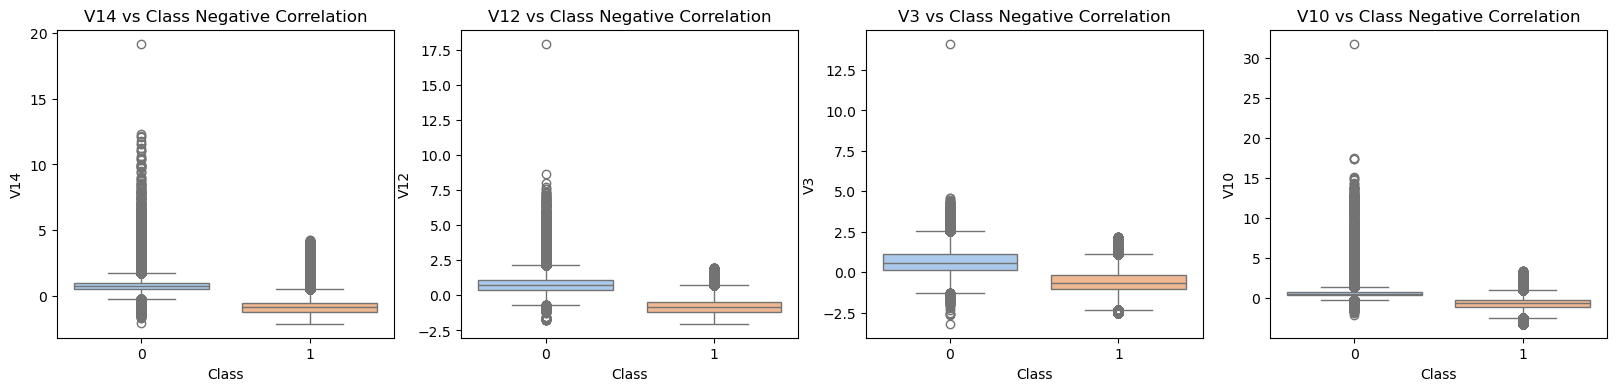

In [14]:
# Negative Correlations: The lower the value, the more likely it is a fraudulent transaction

fig, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V14", data=df, palette='pastel', hue="Class", legend=False, ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=df, palette='pastel', hue="Class", legend=False, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V3", data=df, palette='pastel', hue="Class", legend=False, ax=axes[2])
axes[2].set_title('V3 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=df, palette='pastel', hue="Class", legend=False, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

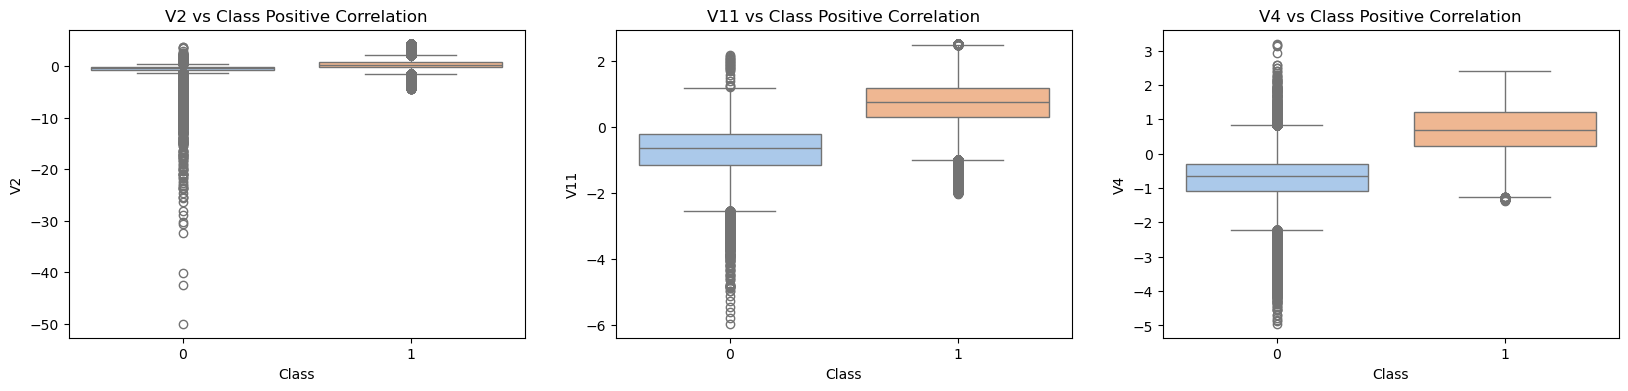

In [15]:
# Positive Correlations - The higher the feature value, the more likely it is a fraudulent transaction

fig, axes = plt.subplots(ncols=3, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=df, palette='pastel', hue="Class", legend=False, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=df, palette='pastel', hue="Class", legend=False, ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, palette='pastel', hue="Class", legend=False, ax=axes[2])
axes[2].set_title('V4 vs Class Positive Correlation')

plt.show()

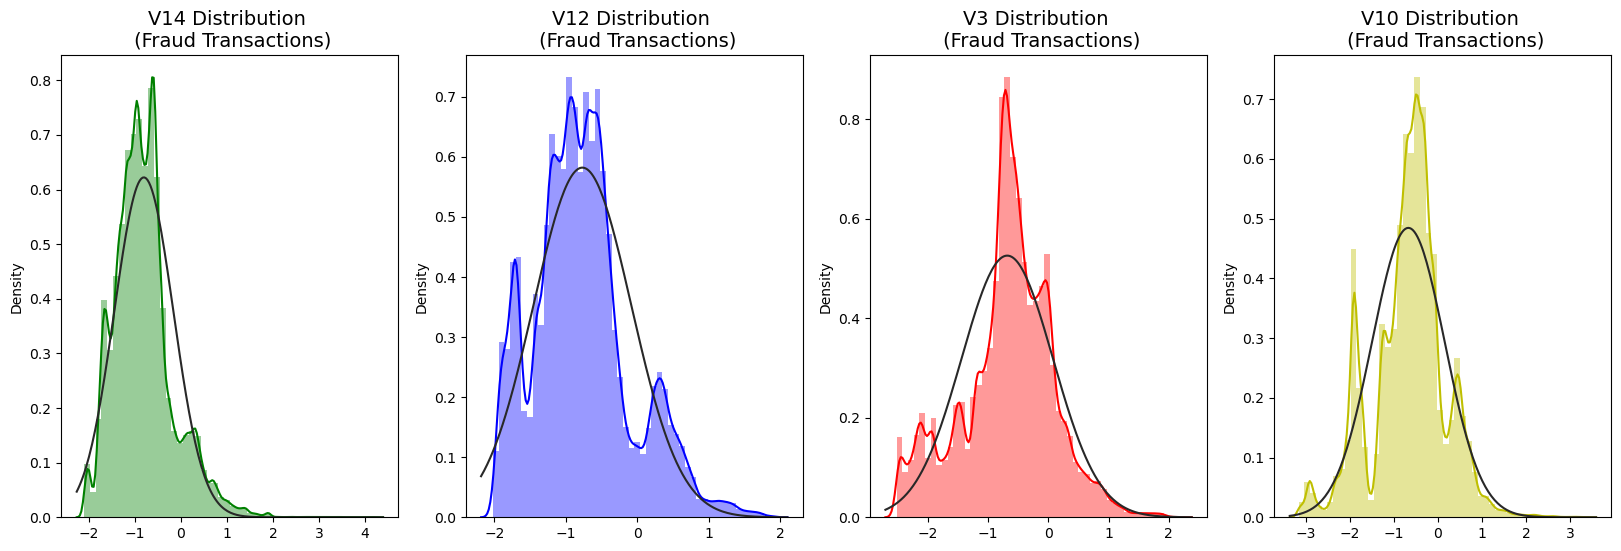

In [16]:
from scipy.stats import norm

fig, axes = plt.subplots(ncols=4, figsize=(20,6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values 
sns.distplot(v14_fraud_dist, ax=axes[0], fit=norm, color='g')
axes[0].set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values 
sns.distplot(v12_fraud_dist, ax=axes[1], fit=norm, color='b')
axes[1].set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v3_fraud_dist = df['V3'].loc[df['Class'] == 1].values 
sns.distplot(v3_fraud_dist, ax=axes[2], fit=norm, color='r')
axes[2].set_title('V3 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values 
sns.distplot(v10_fraud_dist, ax=axes[3], fit=norm, color='y')
axes[3].set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

As this is a large dataset, there will naturally be outliers. From the boxplots, it is difficult to see whether these outliers are truly outliers or just noise. Furthermore, as the features are unknown due to privacy reasons, it makes it even more difficult. Therefore, for this case, we will **not be removing outliers**.

### Dimensionality Reduction

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

X = df.drop('Class', axis=1)
y = df['Class']

# t-SNE 
# t-SNE is computationally expensive. Therefore, code is commented out.

# t0 = time.time()
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("t-SNE took {:.2} s".format(t1 - t0))

# PCA 
t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_reduced_pca = pca.fit_transform(X.values)
t1 = time.time()
print(pca.explained_variance_ratio_)
print("PCA took {:.2} s".format(t1 - t0))

[0.34668894 0.09916613]
PCA took 1.5 s


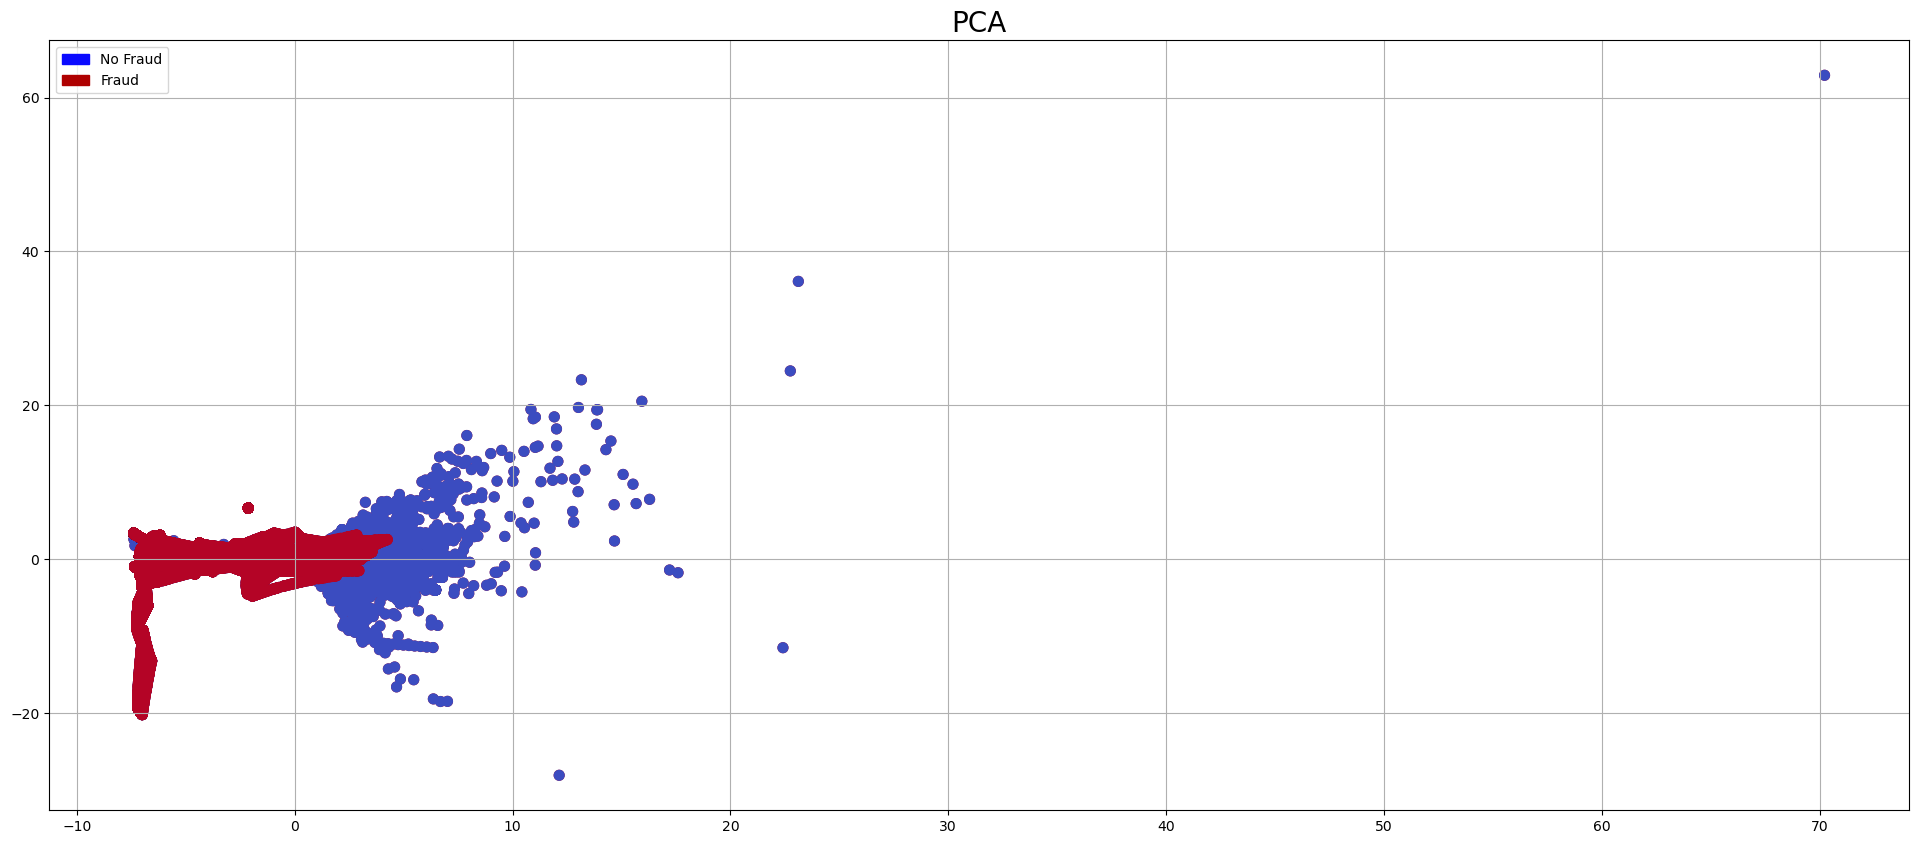

In [18]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(24,10))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# Reduced tSNE plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), label='No Fraud', cmap='coolwarm')
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), label='Fraud', cmap='coolwarm')
# ax1.set_title('t-SNE', fontsize=14)
# ax1.legend(handles=[blue_patch, red_patch])

# ax1.grid(True)

# PCA scatter plot
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('PCA', fontsize=20)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

plt.show()

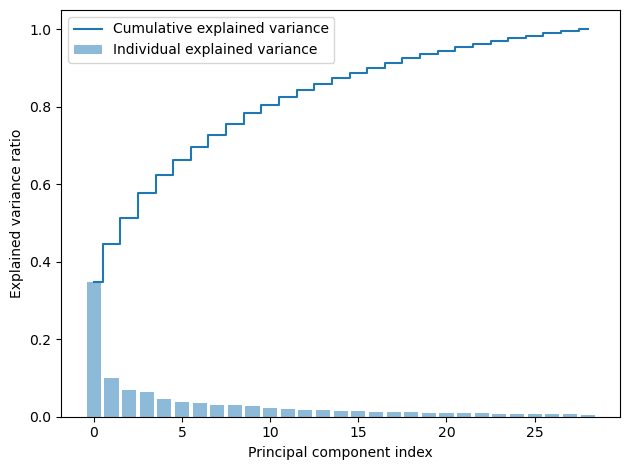

In [19]:
pca = PCA()

X_reduced_pca = pca.fit_transform(X.values)
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot for visualising the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualisation plot

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From this explained variance ratio plot, we can visualise the explained variance by each principal component. The first two components explain rougly 35% and 1% variance. The first PC is much more "important" compared to the other PCs. 

https://saturncloud.io/blog/what-is-sklearn-pca-explained-variance-and-explained-variance-ratio-difference/#interpreting-explained-variance-and-explained-variance-ratio

### Classifiers

First, we train the following classifiers with default/no set parameters. Then, we perform GridSearch to find the best parameters.
- Logistic Regression
- KNearest Neighbor
- Support Vector Classifier (SVC)
- Random Forest Classifier

As our dataset is very large, let's random sample an equal number (500) of fraud and non-fraud transactions. 

In [20]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1][:500]
non_fraud_df = df.loc[df['Class'] == 0][:500]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print(f"No. of non-fraud transactions = {new_df['Class'].value_counts()[0]}")
print(f"No. of fraud transactions = {new_df['Class'].value_counts()[1]}")

No. of non-fraud transactions = 500
No. of fraud transactions = 500


In [21]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Random Forest Classifier": RandomForestClassifier()
}

In [24]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 96.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 96.0 % accuracy score
Classifiers:  SVC Has a training score of 95.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 96.0 % accuracy score


### RandomizedSearchCV to find the best hyperparameters
We use RandomizedSearchCV instead of GridSearchCV because it is computationally faster

https://medium.com/@hestisholihah01/hyperparameter-tuning-showdown-grid-search-vs-random-search-which-is-the-ultimate-winner-5927b322e54d

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Logistic Regression

log_reg_grid = {"penalty": ['l1', 'l2'], 'C': np.logspace(-3,3,7)}
log_reg_search = RandomizedSearchCV(LogisticRegression(), log_reg_grid)
log_reg_search.fit(X_train, y_train)
log_reg = log_reg_search.best_estimator_

# K-nearest Neighbor

knears_grid = {"n_neighbors": list(range(2,11,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                "weights": ['uniform', 'distance'], "p": np.arange(1,3)}
knears_search = RandomizedSearchCV(KNeighborsClassifier(), knears_grid)
knears_search.fit(X_train, y_train)
knears = knears_search.best_estimator_

# SVC

svc_grid = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
svc_search= RandomizedSearchCV(SVC(), svc_grid)
svc_search.fit(X_train, y_train)
svc = svc_search.best_estimator_

# Random Forest

rf_grid = {"n_estimators": list(range(200, 1200, 200)), "max_features": ['auto', 'sqrt'], "max_depth": list(range(20, 120, 20)),
          "min_samples_leaf": [1, 2, 4], "min_samples_split": [2, 5, 10]}
rf_search = RandomizedSearchCV(RandomForestClassifier(), rf_grid)
rf_search.fit(X_train, y_train)
rf = rf_search.best_estimator_

In [26]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears, X_train, y_train, cv=5)
print('K-nearest Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('SVC Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score', round(rf_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  95.62%
K-nearest Neighbors Cross Validation Score 97.12%
SVC Cross Validation Score 95.5%
Random Forest Classifier Cross Validation Score 96.25%


From the cross validation score, we can see that KNN performed the best out of the 4 classifiers

### Learning Curves
Learning curves can let us see whether we are overfitting or underfitting our model
- The wider the gap between the training score and cross validation score, the more likely the model is overfitting (high variance)
- If the score is low on both fronts, then our model is underfitting

In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#ff9124")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training Size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("K-nearest Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training Size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("SVC Learning Curve", fontsize=14)
    ax3.set_xlabel('Training Size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Random Forest Learning Curve", fontsize=14)
    ax4.set_xlabel('Training Size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

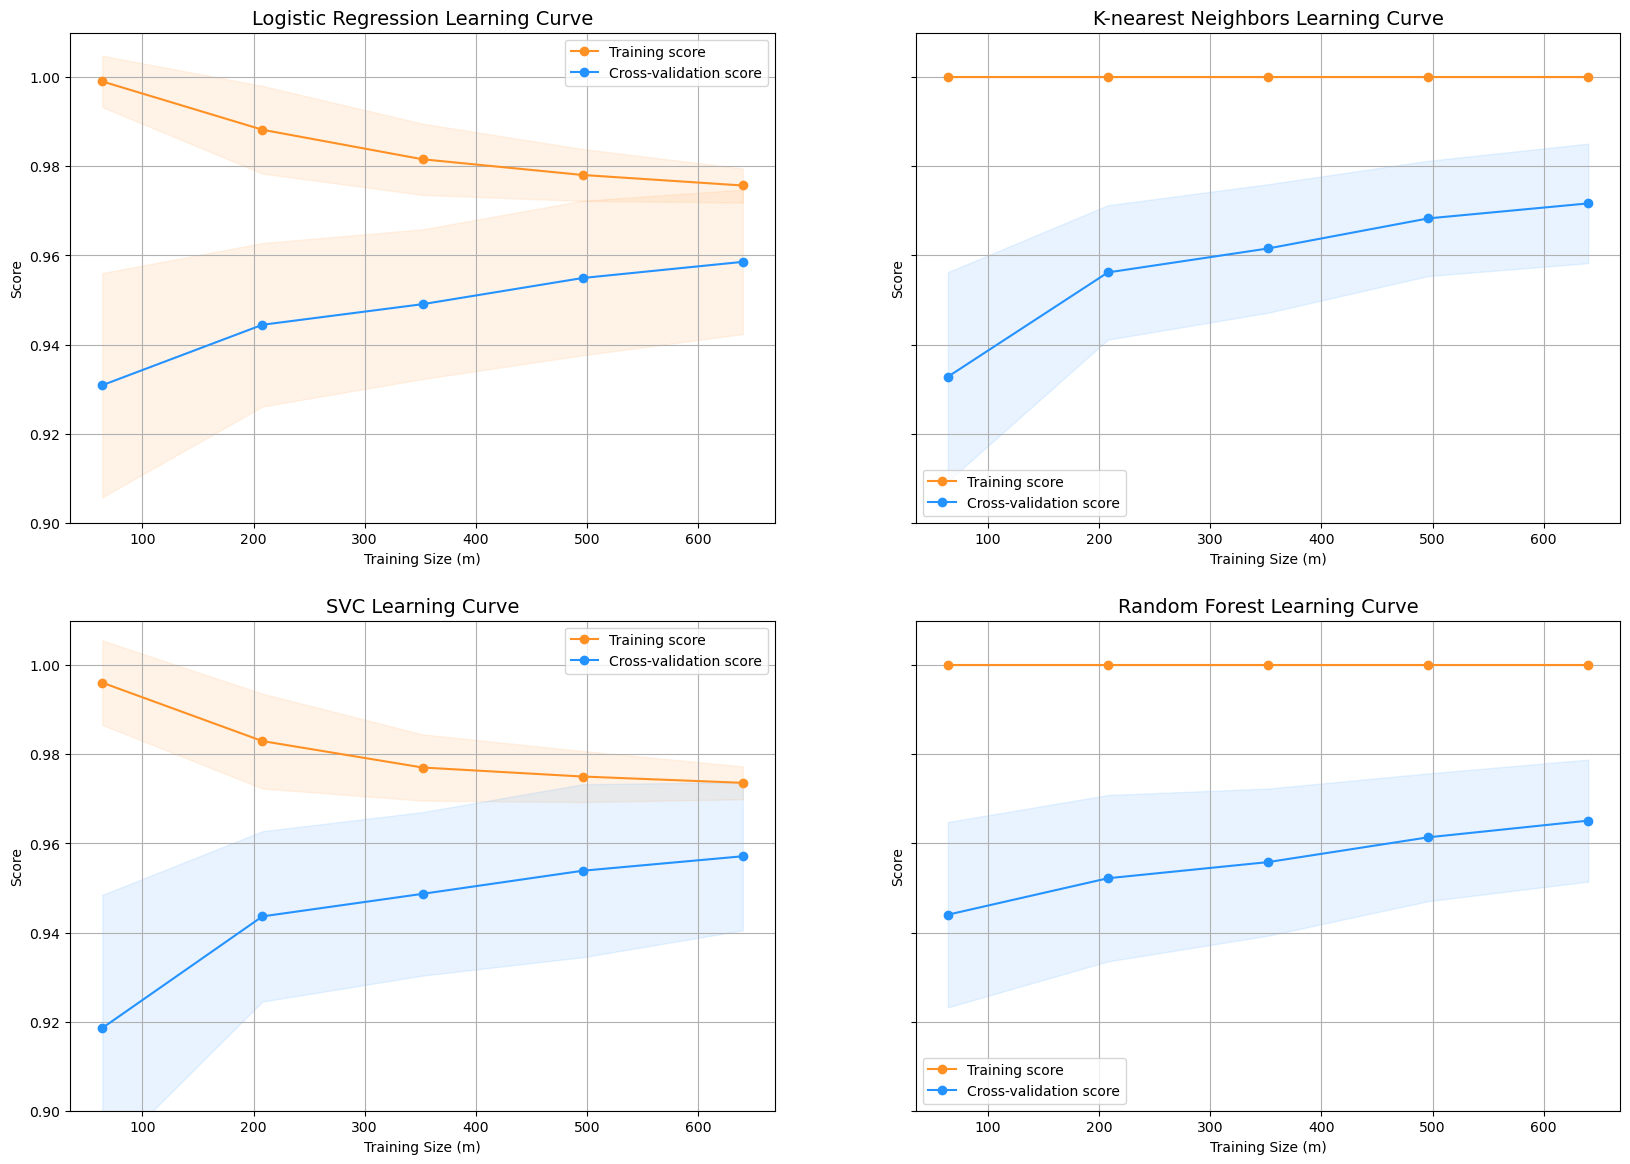

In [28]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears, svc, rf, X_train, y_train, (0.9, 1.01), cv=cv, n_jobs=4)

**Logistic Regression Learning Curve**
- Training Score: Decreases as the training size increases. This suggests that the model is slightly overfitting with a smaller dataset as it performs extremely well on the training set initially
- Cross-validation Score: Starts lower at ~0.93-0.94 then gradually increases with more data, indicating that the model generalises better with more data. 
- Conclusion: Logistic regression performed relatively well. The gap between the training and cross validation scores decrease as the training size increases, suggesting that it benefits from more data to improve generalisation.

**KNN Learning Curve**
- Training Score: Remains at a perfect score (1.0) regardless of training size. This is typical behavior for KNN, as it memorises the training data perfectly. 
- Cross-validation Score: Starts quite low around 0.92 with a small sample size and improves as more data is used, with some variance. However, there’s still a considerable gap between the training and validation scores, implying overfitting.
- Conclusion: KNN is overfitting, as indicated by the perfect training score and a lower, yet improving cross-validation score. The model may need tuning (e.g., increasing the number of neighbors) to improve its generalisation.

**SVC Learning Curve**
- Training Score: Similar to logistic regression, the training score starts at 1.0 and declines as the sample size increases, reaching around 0.98.
- Cross-validation Score: Starts at a lower score (around 0.92) and improves as the training size increases, approaching around 0.96.
- Conclusion: The SVC shows a similar trend to logistic regression, where the gap between training and cross-validation scores decreases with more data. This suggests that the SVC model is overfitting less as the sample size increases and benefits from larger datasets.

**Random Forest Learning Curve**
- Training Score: Remains at 1.0 regardless of the training set size, indicating that the Random Forest model perfectly fits the training data, which is expected behavior due to its ensemble nature.
- Cross-validation Score: Starts lower but steadily increases as the training set grows, with some variance. The score shows improvement with more data but does not quite catch up to the training score.
- Conclusion: Random Forest is overfitting (like KNN), as it achieves perfect scores on the training set but lower scores on the validation set. Increasing the training set size helps reduce the gap but doesn’t fully resolve the overfitting issue.

**General Observations:**
- Overfitting: KNN and Random Forest show signs of overfitting (large gap between training and cross-validation scores).
- Underfitting: Logistic Regression and SVC show less overfitting and have improving cross-validation scores as training data increases.
- Data Sensitivity: All models show improvement in cross-validation scores with increasing data, though Random Forest and KNN are more sensitive to overfitting.

### ROC Curve
ROC: A single number that summarizes how well a classifier can distinguish between positive and negative classes. The score is calculated by measuring the area under the ROC curve, which shows how well a model performs for every possible threshold.

In [29]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method='decision_function')
knears_pred = cross_val_predict(knears, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")
rf_pred = cross_val_predict(rf, X_train, y_train, cv=5)

In [31]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score

log_reg_auc_score = roc_auc_score(y_train, log_reg_pred)
knears_auc_score = roc_auc_score(y_train, knears_pred)
svc_auc_score = roc_auc_score(y_train, svc_pred)
rf_auc_score = roc_auc_score(y_train, rf_pred)

print('Logistic Regression: ', log_reg_auc_score)
print('K-nearest Neighbors: ', knears_auc_score)
print('Support Vector Classifier: ', svc_auc_score)
print('Random Forest: ', rf_auc_score)

Logistic Regression:  0.9894875
K-nearest Neighbors:  0.9712500000000001
Support Vector Classifier:  0.991025
Random Forest:  0.9612500000000002


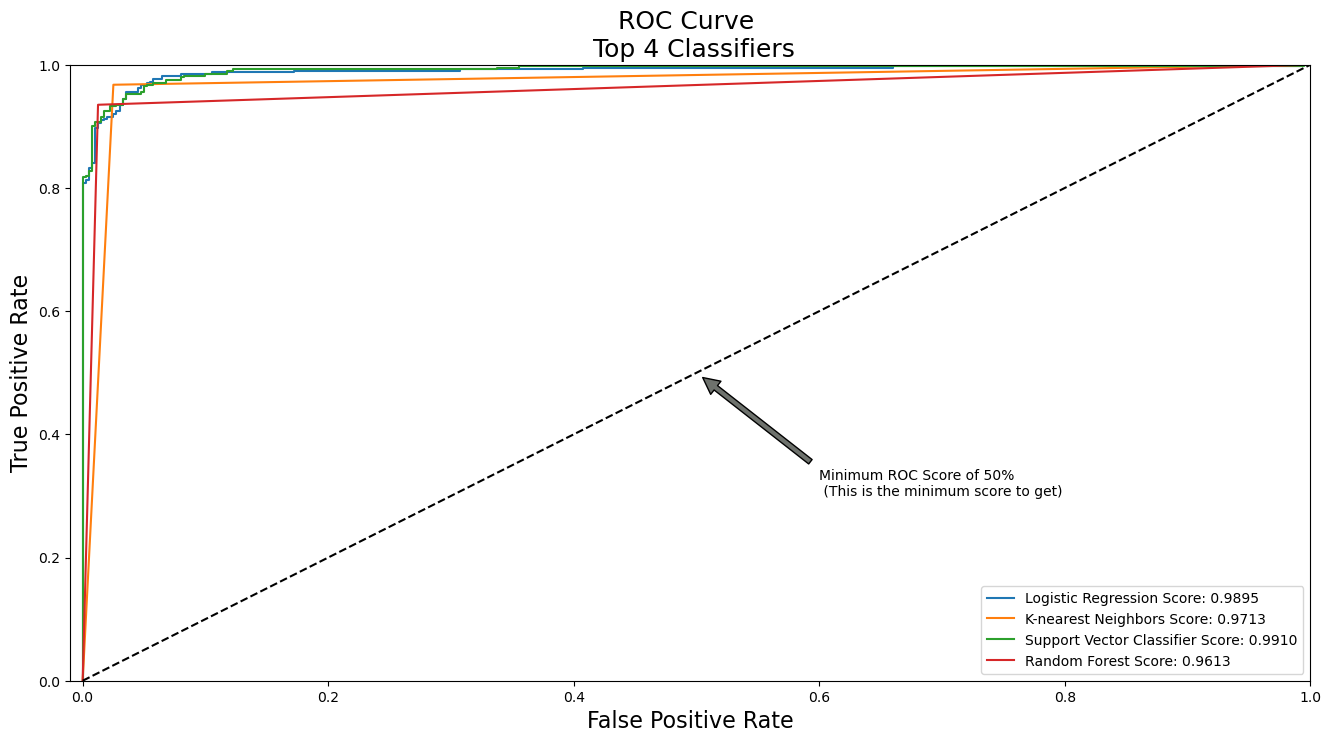

In [32]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)


def graph_roc_curves(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Score: {:.4f}'.format(log_reg_auc_score))
    plt.plot(knear_fpr, knear_tpr, label='K-nearest Neighbors Score: {:.4f}'.format(knears_auc_score))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(svc_auc_score))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Score: {:.4f}'.format(rf_auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curves(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr)
plt.show()

From the ROC score, SVC is the best model. Let's explore deeper SVC.

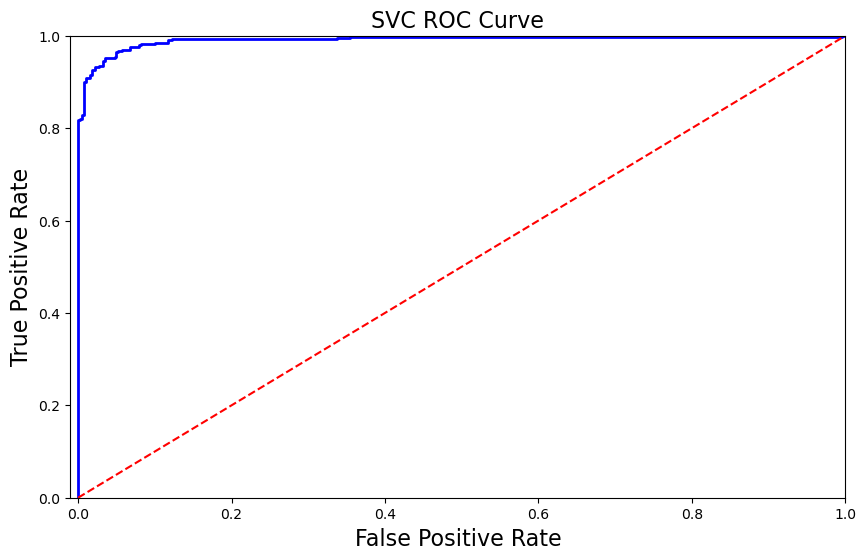

In [34]:
def svc_roc_curve(svc_fpr, svc_tpr):
    plt.figure(figsize=(10,6))
    plt.title('SVC ROC Curve', fontsize=16)
    plt.plot(svc_fpr, svc_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
svc_roc_curve(svc_fpr, svc_tpr)
plt.show()

In [42]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

log_reg_y_pred = log_reg.predict(X_test)
knears_y_pred = knears.predict(X_test)
svc_y_pred = svc.predict(X_test)
rf_y_pred = rf.predict(X_test)

print('Logistic Regression Recall Score: {:.2f}'.format(recall_score(y_test, log_reg_y_pred)))
print('Logistic Regression Precision Score: {:.2f}'.format(precision_score(y_test, log_reg_y_pred)))
print('Logistic Regression F1 Score: {:.2f}'.format(f1_score(y_test, log_reg_y_pred)))
print('Logistic Regression Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg_y_pred)))
print('---' * 30)
print('K-nearest Neighbor Recall Score: {:.2f}'.format(recall_score(y_test, knears_y_pred)))
print('K-nearest Neighbor Precision Score: {:.2f}'.format(precision_score(y_test, knears_y_pred)))
print('K-nearest Neighbor F1 Score: {:.2f}'.format(f1_score(y_test, knears_y_pred)))
print('K-nearest Neighbor Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knears_y_pred)))
print('---' * 30)
print('SVC Recall Score: {:.2f}'.format(recall_score(y_test, svc_y_pred)))
print('SVC Precision Score: {:.2f}'.format(precision_score(y_test, svc_y_pred)))
print('SVC F1 Score: {:.2f}'.format(f1_score(y_test, svc_y_pred)))
print('SVC Accuracy Score: {:.2f}'.format(accuracy_score(y_test, svc_y_pred)))
print('---' * 30)
print('Random Forest Recall Score: {:.2f}'.format(recall_score(y_test, rf_y_pred)))
print('Random Forest Precision Score: {:.2f}'.format(precision_score(y_test, rf_y_pred)))
print('Random Forest F1 Score: {:.2f}'.format(f1_score(y_test, rf_y_pred)))
print('Random Forest Accuracy Score: {:.2f}'.format(accuracy_score(y_test, rf_y_pred)))

Logistic Regression Recall Score: 0.98
Logistic Regression Precision Score: 0.97
Logistic Regression F1 Score: 0.98
Logistic Regression Accuracy Score: 0.97
------------------------------------------------------------------------------------------
K-nearest Neighbor Recall Score: 0.97
K-nearest Neighbor Precision Score: 0.94
K-nearest Neighbor F1 Score: 0.96
K-nearest Neighbor Accuracy Score: 0.95
------------------------------------------------------------------------------------------
SVC Recall Score: 0.97
SVC Precision Score: 0.96
SVC F1 Score: 0.97
SVC Accuracy Score: 0.96
------------------------------------------------------------------------------------------
Random Forest Recall Score: 0.96
Random Forest Precision Score: 0.98
Random Forest F1 Score: 0.97
Random Forest Accuracy Score: 0.97


### Confusion Matrices
- Positive/Negative: Type of Class (label) ["No Fraud", "Fraud"] True/False: Correctly or Incorrectly classified by the model.
- True Negatives (Top-Left Square): Number of correctly classifications of the No Fraud class.
- False Negatives (Top-Right Square): Number of incorrectly classifications of the No Fraud class.
- False Positives (Bottom-Left Square): Number of incorrectly classifications of the Fraud class
- True Positives (Bottom-Right Square): Number of correctly classifications of the Fraud class.

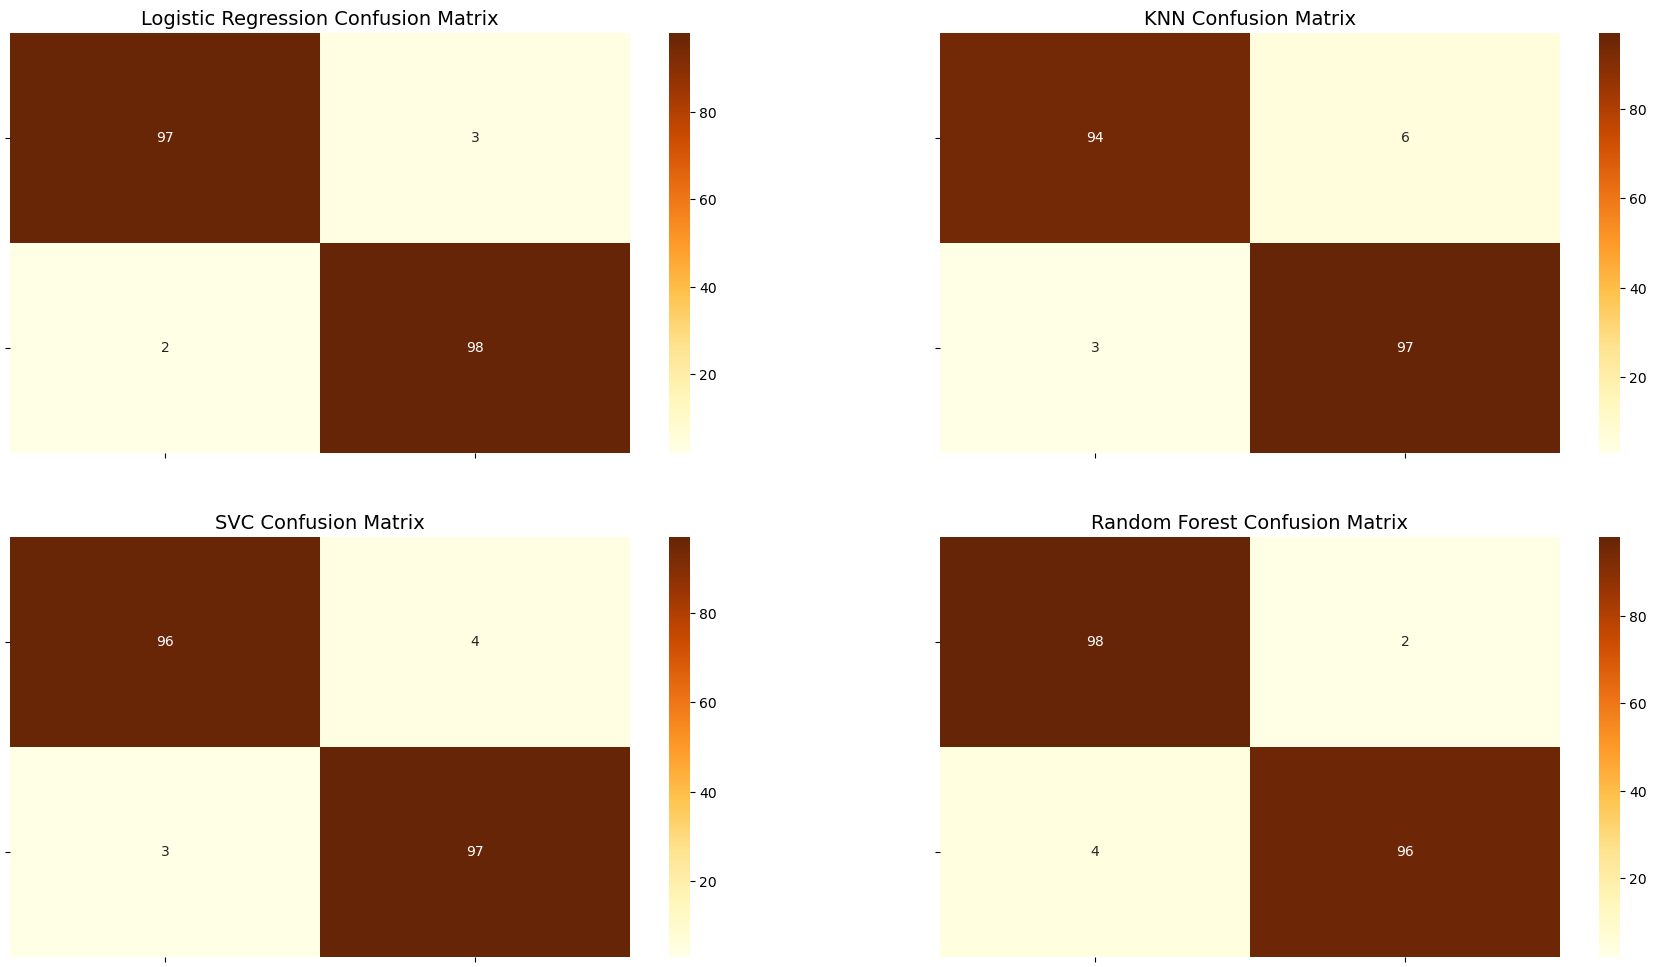

In [41]:
from sklearn.metrics import confusion_matrix

log_reg_cf = confusion_matrix(y_test, log_reg_y_pred)
knears_cf = confusion_matrix(y_test, knears_y_pred)
svc_cf = confusion_matrix(y_test, svc_y_pred)
rf_cf = confusion_matrix(y_test, rf_y_pred)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap='YlOrBr')
ax[0, 0].set_title("Logistic Regression Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(knears_cf, ax=ax[0][1], annot=True, cmap='YlOrBr')
ax[0][1].set_title("KNN Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap='YlOrBr')
ax[1][0].set_title("SVC Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1][1], annot=True, cmap='YlOrBr')
ax[1][1].set_title("Random Forest Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [43]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, log_reg_y_pred))

print('KNN:')
print(classification_report(y_test, knears_y_pred))

print('SVC:')
print(classification_report(y_test, svc_y_pred))

print('Random Forest:')
print(classification_report(y_test, rf_y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.97      0.98      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

KNN:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       100
           1       0.94      0.97      0.96       100

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

SVC:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.96      0.97      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96

### Final Score of SVC on Test Dataset

In [47]:
from sklearn.metrics import accuracy_score

y_pred = svc.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Final score of SVC on test dataset =", score)

Final score of SVC on test dataset = 0.965
